# COMPARACIÓN DE TENSIONES EN ADC - DOS CORRIDAS 

"\nax05.legend(loc='upper right',fontsize=25)\nax05.set_xlabel('t',fontsize = 25) \nax05[0].set_ylabel('ADC', rotation = 0,fontsize =25) \nax05[0].tick_params(axis='both', which='major', labelsize=20)\nax05[0].xaxis.set_label_coords(0.94,0.03)\nax05[0].yaxis.set_label_coords(0.03,0.95)\nax05[1].legend(loc='upper right',fontsize=25)                         \nax05[1].tick_params(axis='both', which='major',labelsize=20) \nax05[1].set_xlabel('t',fontsize = 25) \nax05[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) \nax05[1].set_xlim([0,2001]) \nax05[1].set_ylim([0,800]) \nax05[1].xaxis.set_label_coords(0.94,0.03)\nax05[1].yaxis.set_label_coords(0.03,0.95)\nfig05.savefig(path_file+'TC-I-ADC-0.5.jpg') \n"

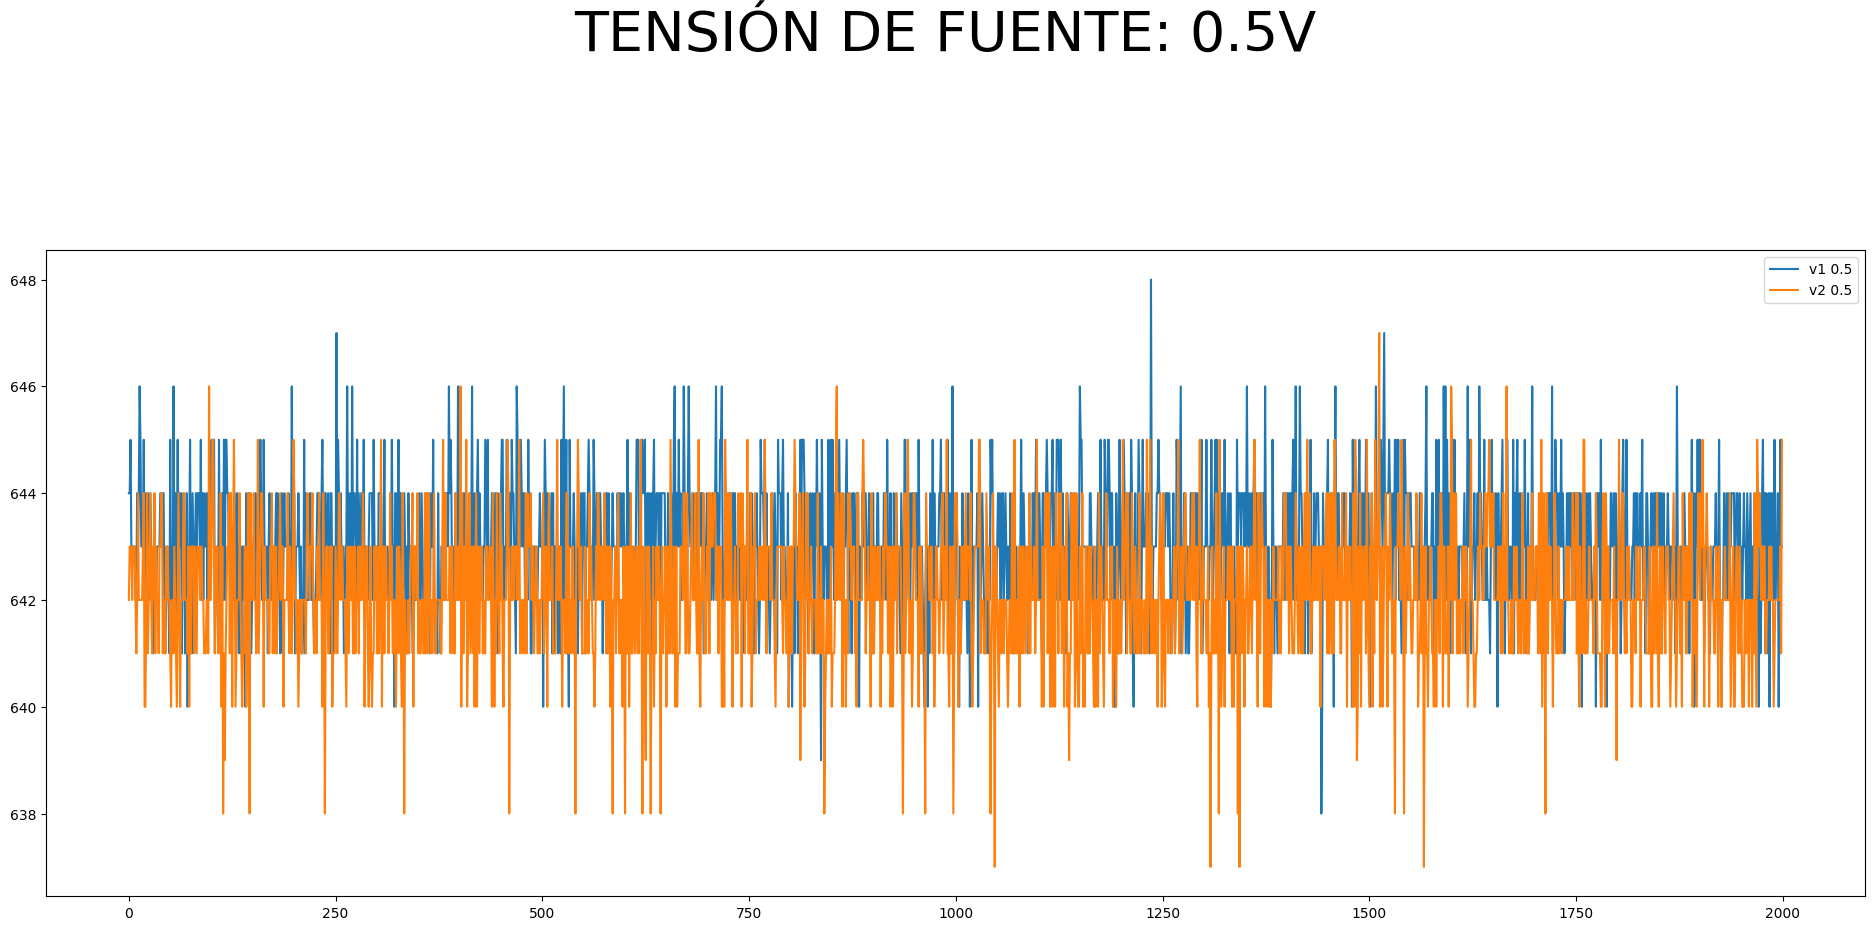

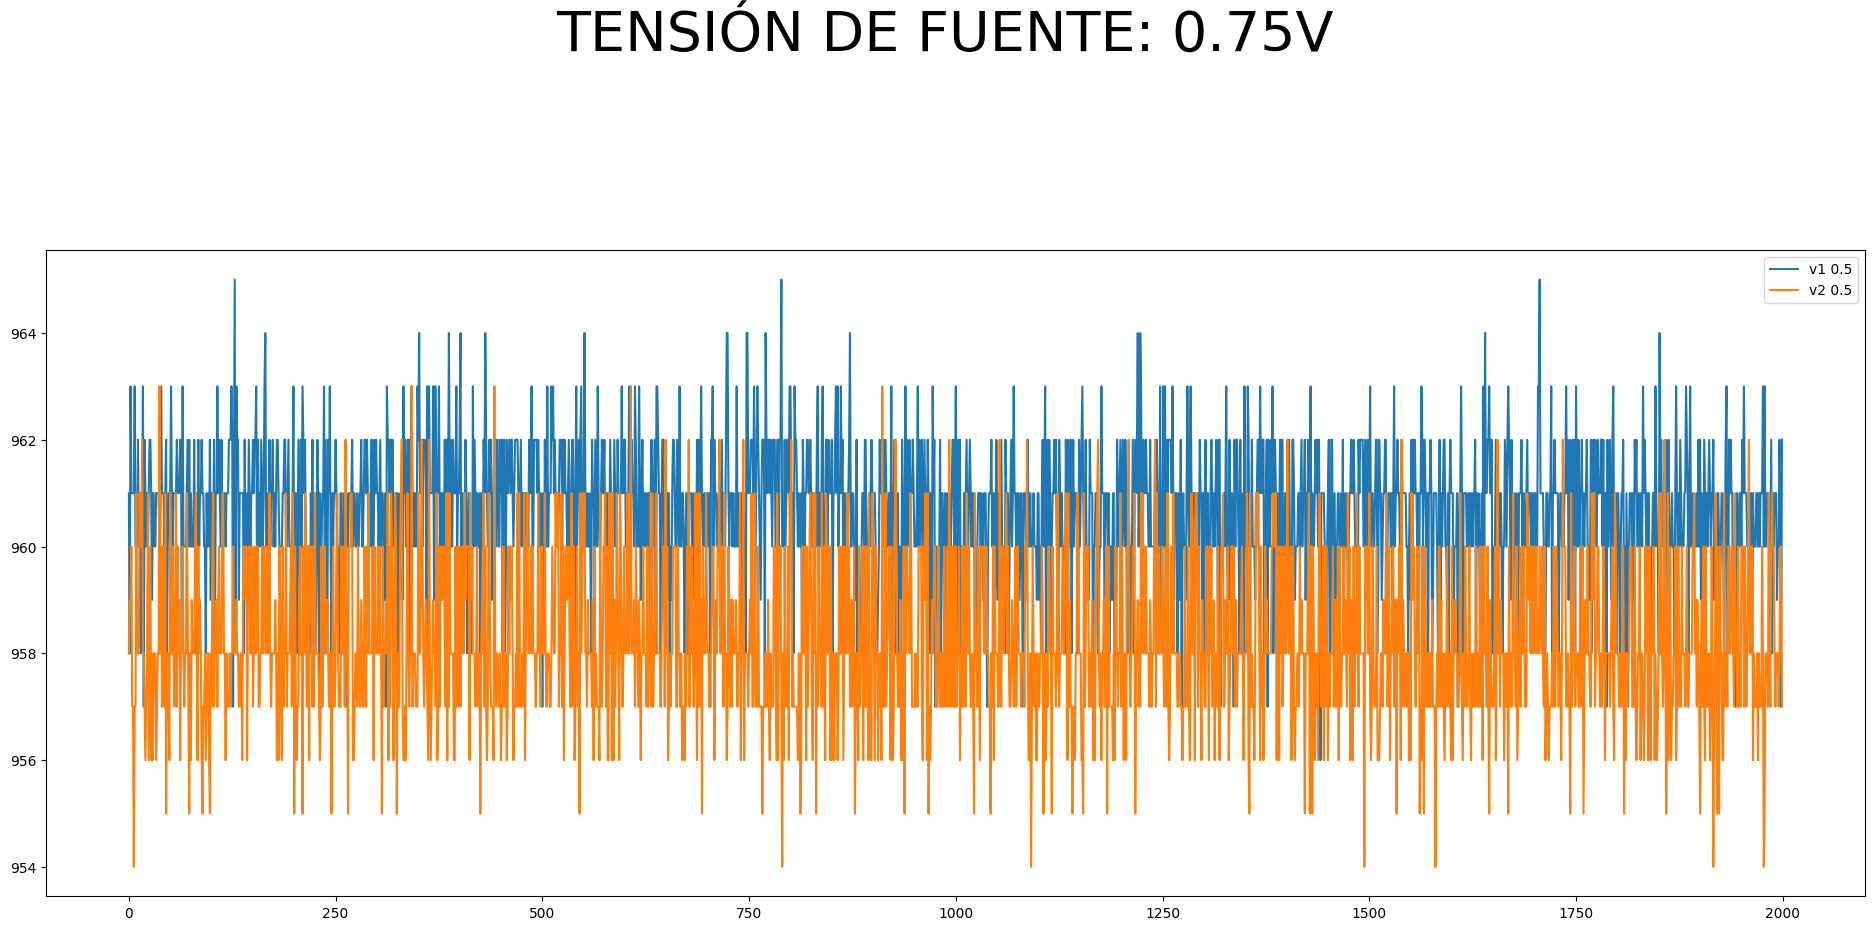

In [10]:
import matplotlib.pylab as plt
import numpy as np 
path_file = '../../../results/TC-I-ADC/'
list_files_tcI=['TC-I-ADC-0.5.txt','TC-I-ADC-0.75.txt','TC-I-ADC-1.00.txt','TC-I-ADC-1.50.txt','TC-I-ADC-2.00.txt','TC-I-ADC-2.75.txt', 'TC-I-ADC-3.30.txt']

path_fileIII = '../../../results/TC-III-ADC/'
list_files_tcIII = ['TC-III-ADC-0.50.txt',
                    'TC-III-ADC-0.75.txt',
                    'TC-III-ADC-1.00.txt',
                    'TC-III-ADC-1.50.txt',
                    'TC-III-ADC-2.00.txt',
                    'TC-III-ADC-2.75.txt',
                    'TC-III-ADC-3.30.txt']


voltage_source = [0.5,0.75,1.0,1.5,2.0,2.75,3.3]



NBITS = 12 
MAX_VALUE =4096 #2**12 
SOURCE_ADC_VOLTAGE = 3.30 #MEASURE OF GND
raw_adc_I = np.zeros((2000,len(list_files_tcI)),dtype=int)
raw_adc_II = np.zeros((2000,len(list_files_tcI)),dtype=int)

v_compute_raw_adcI= np.zeros((2000,len(list_files_tcI)))
v_compute_raw_adcII= np.zeros((2000,len(list_files_tcI)))
ADC_voltage_expected_sourceI = []
ADC_mean_samplesI = []
ADC_max_sampleI = []
ADC_min_sampleI = [] 

ADC_voltage_expected_sourceII = []
ADC_mean_samplesII = []
ADC_max_sampleII = []
ADC_min_sampleII = [] 





### Values of compute of script 
##  Expected values compute 
## position indicate a file using a list_files_tcI
n_samples_adc = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 


for i in range(0,len(voltage_source)):
    ADC_voltage_expected_sourceI.append(int( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_source[i]))
    ADC_voltage_expected_sourceII.append(int(( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_source[i])))
    

### PROCESSING FILES FOR EXTRACT DATA !     
i = 0 
for file in list_files_tcI:    
    d0,d1,d2 = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    d2 =d2.astype(int) 
    raw_adc_I[:,i] = d2 
    ADC_mean_samplesI.append(np.mean(d2))
    ADC_max_sampleI.append(np.amax(d2))
    ADC_min_sampleI.append(np.amin(d2))
    i = i +1 

i = 0 
for file in list_files_tcIII:    
    index,hex_diff,dec_diff,hex_ref,dec_ref,hex_raw_adc,dec_raw_adc = np.genfromtxt(path_fileIII+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    dec_raw_adc = dec_raw_adc.astype(int)      
    ## load values in a column of vector 
    raw_adc_II[:,i] = dec_raw_adc 
    ADC_mean_samplesII.append(np.mean(dec_raw_adc))
    ADC_max_sampleII.append(np.amax(dec_raw_adc))
    ADC_min_sampleII.append(np.amin(dec_raw_adc))
    i = i + 1 



for i in range(0,len(list_files_tcI)): 
    v_compute_raw_adcI[:,i] = raw_adc_I[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)
    v_compute_raw_adcII[:,i] = raw_adc_II[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)





## PLOTTING FIGURES 

######################################### SOURCE OF 0.5V  ###############################################################

figVolt05, ax05 = plt.subplots(figsize=(20,10))
figVolt05.suptitle('TENSIÓN DE FUENTE: 0.5V\n',fontsize = 40)
figVolt05.tight_layout(pad=5.0)
l1=ax05.plot(n_samples_adc, raw_adc_I[:,0],label='v1 0.5',color='#1f77b4')
l1=ax05.plot(n_samples_adc, raw_adc_II[:,0],label='v2 0.5',color='#ff7f0e')
ax05.legend()

######################################### SOURCE OF 0.5V  ###############################################################



######################################### SOURCE OF 0.5V  ###############################################################

figVolt075, ax075 = plt.subplots(figsize=(20,10))
figVolt075.suptitle('TENSIÓN DE FUENTE: 0.75V\n',fontsize = 40)
figVolt075.tight_layout(pad=5.0)
l1=ax075.plot(n_samples_adc, raw_adc_I[:,1],label='v1 0.5',color='#1f77b4')
l1=ax075.plot(n_samples_adc, raw_adc_II[:,1],label='v2 0.5',color='#ff7f0e')
ax075.legend()

######################################### SOURCE OF 0.5V  ###############################################################





















"""
ax05.legend(loc='upper right',fontsize=25)
ax05.set_xlabel('t',fontsize = 25) 
ax05[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax05[0].tick_params(axis='both', which='major', labelsize=20)
ax05[0].xaxis.set_label_coords(0.94,0.03)
ax05[0].yaxis.set_label_coords(0.03,0.95)
ax05[1].legend(loc='upper right',fontsize=25)                         
ax05[1].tick_params(axis='both', which='major',labelsize=20) 
ax05[1].set_xlabel('t',fontsize = 25) 
ax05[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax05[1].set_xlim([0,2001]) 
ax05[1].set_ylim([0,800]) 
ax05[1].xaxis.set_label_coords(0.94,0.03)
ax05[1].yaxis.set_label_coords(0.03,0.95)
fig05.savefig(path_file+'TC-I-ADC-0.5.jpg') 
"""







